<a href="https://colab.research.google.com/github/RahulBattula/Bird-Audio-Classification/blob/main/Practice_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\huge \color{#1C110A}{\textbf{Bird's Audio Classification}}$

In [1]:
import pandas as pd
import os
import librosa

audio_dataset_path='/content/wavfiles'
metadata=pd.read_csv('/content/bird_songs_metadata.csv',usecols=['name','filename'])
metadata.head()

,name,filename
0,Bewick's Wren,557838-0.wav
1,Bewick's Wren,557838-1.wav
2,Bewick's Wren,557838-4.wav
3,Bewick's Wren,557838-5.wav
4,Bewick's Wren,557838-6.wav


In [2]:
metadata['name'].value_counts()

Song Sparrow            1256
Northern Mockingbird    1182
Northern Cardinal       1074
American Robin          1017
Bewick's Wren            893
Name: name, dtype: int64

In [3]:
# import os
# os.environ['KAGGLE_USERNAME'] = 'rahulbattula1'
# os.environ['KAGGLE_KEY'] = '7220f5ccf343309b5f337d6ad9b49afc'

In [4]:
# !kaggle datasets download -d vinayshanbhag/bird-song-data-set

In [5]:
# !unzip bird-song-data-set.zip

In [6]:
ls -l ./wavfiles/ | grep -c ^-

9107


In [7]:
import os
import librosa
import pandas as pd

audio_folder = "/content/wavfiles"
metadata = pd.read_csv('/content/bird_songs_metadata.csv', usecols=['name', 'filename'])

# Function to calculate audio duration and print files with 3 seconds duration
def get_audio_duration(row):
    file_path = os.path.join(audio_folder, row['filename'])

    # Check if the file exists
    if os.path.exists(file_path):
        try:
            audio_data, _ = librosa.load(file_path, sr=None)
            duration = librosa.get_duration(y=audio_data)

            return duration
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
            return None
    else:
        print(f"File not found: {file_path}")
        return None

# Calculating duration for each audio file
metadata['duration'] = metadata.apply(get_audio_duration, axis=1)

count_greater_than_3s = (metadata['duration'] > 3).sum()
count_less_than_3s = (metadata['duration'] < 3).sum()
count_equal_to_3s = (metadata['duration'] == 3).sum()

print(f"Number of files with duration greater than 3 seconds: {count_greater_than_3s}")
print(f"Number of files with duration less than 3 seconds: {count_less_than_3s}")
print(f"Number of files with duration equal to 3 seconds: {count_equal_to_3s}")

Number of files with duration greater than 3 seconds: 0
Number of files with duration less than 3 seconds: 0
Number of files with duration equal to 3 seconds: 5422


Species: Bewick's Wren
Sample rate: 22050
Bit depth: 32 bits
Bit rate: 705600 bps
Number of channels: 1
Audio data shape: (66150,)
Audio file path: /content/wavfiles/173148-0.wav


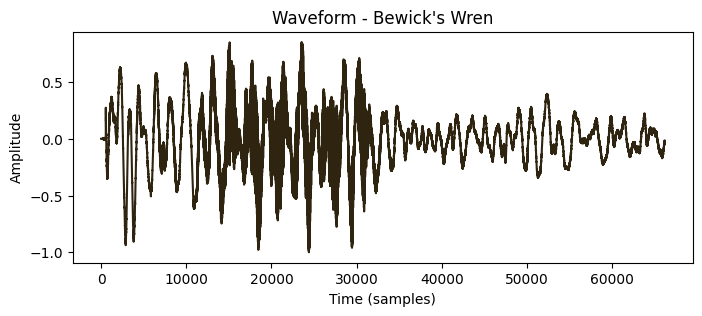

Species: Northern Mockingbird
Sample rate: 22050
Bit depth: 32 bits
Bit rate: 705600 bps
Number of channels: 1
Audio data shape: (66150,)
Audio file path: /content/wavfiles/14212-3.wav


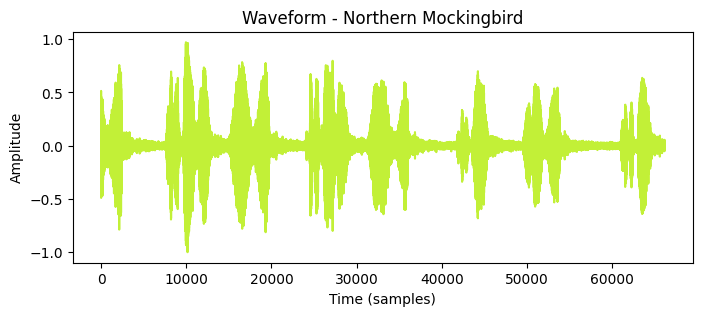

Species: American Robin
Sample rate: 22050
Bit depth: 32 bits
Bit rate: 705600 bps
Number of channels: 1
Audio data shape: (66150,)
Audio file path: /content/wavfiles/469605-6.wav


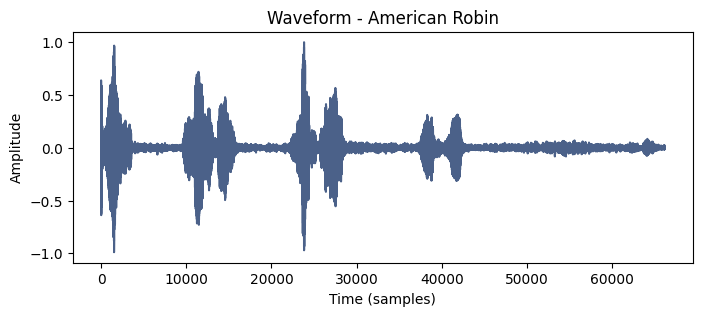

Species: Song Sparrow
Sample rate: 22050
Bit depth: 32 bits
Bit rate: 705600 bps
Number of channels: 1
Audio data shape: (66150,)
Audio file path: /content/wavfiles/18388-1.wav


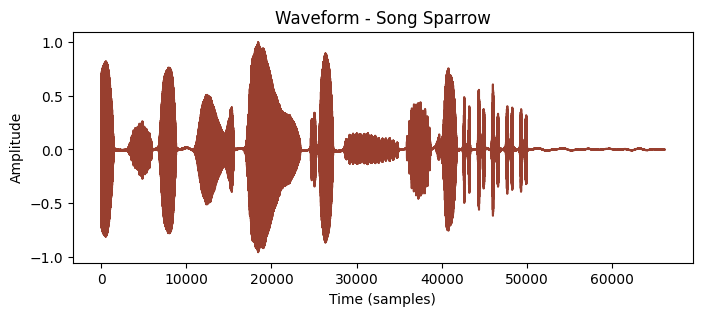

Species: Northern Cardinal
Sample rate: 22050
Bit depth: 32 bits
Bit rate: 705600 bps
Number of channels: 1
Audio data shape: (66150,)
Audio file path: /content/wavfiles/321375-2.wav


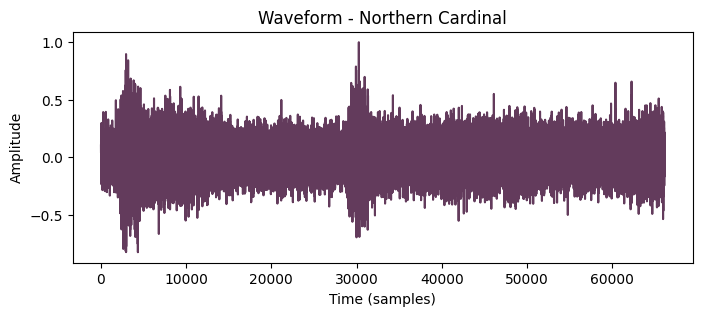

In [8]:
import random
from scipy.io import wavfile
from IPython.display import Audio, display
import matplotlib.pyplot as plt

audio_folder = "/content/wavfiles"

def plot_and_play_wav(metadata, audio_folder):
    random_row = metadata.sample(n=1).iloc[0]
    audio_file_path = os.path.join(audio_folder, random_row['filename'])

    sample_rate, audio_data = wavfile.read(audio_file_path)
    random_color = '#%06x' % random.randint(0, 0xFFFFFF)

    print(f"Species: {random_row['name']}")
    print(f"Sample rate: {sample_rate}")
    print(f"Bit depth: {audio_data.dtype.itemsize * 8} bits")
    print(f"Bit rate: {sample_rate * audio_data.dtype.itemsize * 8} bps")
    print(f"Number of channels: {audio_data.shape[1] if len(audio_data.shape) > 1 else 1}")
    print(f"Audio data shape: {audio_data.shape}")
    print(f"Audio file path: {audio_file_path}")

    plt.figure(figsize=(8, 3))
    plt.plot(audio_data, color=random_color)
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.title(f"Waveform - {random_row['name']}")
    plt.show()

    # Play the audio file
    display(Audio(audio_file_path))

# Iterate through each unique species and plot a random waveform
unique_species = metadata['name'].unique()
for species in unique_species:
    species_metadata = metadata[metadata['name'] == species]
    plot_and_play_wav(species_metadata, audio_folder)

$\Large \color{blue}{\texttt{MFCC}}$

In [9]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=21)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [10]:
import numpy as np
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), str(row["filename"]))
    final_class_labels=row["name"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

5422it [01:22, 65.79it/s]


In [11]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-132.85225, 81.13991, 17.018225, 54.974297, -...",Bewick's Wren
1,"[-147.74393, 99.42544, 20.885645, 44.11881, 1....",Bewick's Wren
2,"[-92.42778, 84.10636, 17.362778, 53.86046, -8....",Bewick's Wren
3,"[-93.07557, 81.17431, 16.225544, 52.088425, -8...",Bewick's Wren
4,"[-107.959145, 92.416, 17.773256, 43.13245, -1....",Bewick's Wren


In [12]:
extracted_features_df['feature'].shape

(5422,)

In [13]:
extracted_features_df['feature'][0].shape

(21,)

In [14]:
pd.DataFrame(extracted_features_df['feature'][0])

,0
0,-132.852249
1,81.139908
2,17.018225
3,54.974297
4,-10.344643
5,24.577351
6,3.074978
7,19.339340
8,5.271629
9,15.171051


In [15]:
type(extracted_features_df['feature'])

pandas.core.series.Series

In [16]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [17]:
type(X)

numpy.ndarray

In [18]:
X.shape

(5422, 21)

In [19]:
X[0]

array([-1.3285225e+02,  8.1139908e+01,  1.7018225e+01,  5.4974297e+01,
       -1.0344643e+01,  2.4577351e+01,  3.0749784e+00,  1.9339340e+01,
        5.2716293e+00,  1.5171051e+01, -7.2438858e-02,  7.5691257e+00,
        1.0887994e+01,  2.6355228e+00, -1.7921886e-01,  1.0019793e+01,
       -4.8704443e+00,  4.9887242e+00, -3.7375500e+00,  6.2743134e+00,
       -1.8889681e+00], dtype=float32)

In [20]:
y.shape

(5422,)

In [21]:
y[0:10]

array(["Bewick's Wren", "Bewick's Wren", "Bewick's Wren", "Bewick's Wren",
       "Bewick's Wren", "Bewick's Wren", "Bewick's Wren", "Bewick's Wren",
       "Bewick's Wren", "Bewick's Wren"], dtype='<U20')

In [22]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
X_train

array([[-271.31616  ,  -26.419064 ,  -63.76474  , ...,    3.886096 ,
           0.5488589,   -2.5603206],
       [-401.3699   ,  -31.111534 ,  -92.245224 , ...,   -5.4280133,
          -4.4046926,   -6.6012044],
       [-366.7505   ,   -3.9161208, -118.178535 , ...,    5.0247483,
          -4.953003 ,    3.951971 ],
       ...,
       [ -63.003605 ,   88.0372   ,  -30.77855  , ...,   -8.846015 ,
          -8.056691 ,  -10.128775 ],
       [-361.9076   ,   30.67692  ,  -64.73752  , ...,   -7.2064624,
           3.933869 ,    9.0967455],
       [-168.7206   ,    1.3105384,  -65.46302  , ...,   -5.7669735,
          -2.3251848,   -5.445334 ]], dtype=float32)

In [25]:
X_train.shape

(4337, 21)

In [26]:
X_test.shape

(1085, 21)

In [27]:
y_train.shape

(4337, 5)

In [28]:
y_test.shape

(1085, 5)

In [29]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [30]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,LSTM, Input, Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [31]:
num_labels=y.shape[1]

In [32]:
num_labels

5

$\Large \color{orange}{\texttt{Sequential}}$

In [33]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(21,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2200      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [35]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [36]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime
checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(X_train, y_train, batch_size=32, epochs=100,
                    validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
127/136 [===========================>..] - ETA: 0s - loss: 13.0009 - accuracy: 0.2404
Epoch 1: val_loss improved from inf to 1.53214, saving model to saved_models/audio_classification.hdf5
136/136 [==============================] - 6s 6ms/step - loss: 12.4743 - accuracy: 0.2398 - val_loss: 1.5321 - val_accuracy: 0.2147
Epoch 2/100
130/136 [===========================>..] - ETA: 0s - loss: 2.7762 - accuracy: 0.2257
Epoch 2: val_loss did not improve from 1.53214
136/136 [==============================] - 1s 6ms/step - loss: 2.7423 - accuracy: 0.2257 - val_loss: 1.6048 - val_accuracy: 0.2452
Epoch 3/100
133/136 [============================>.] - ETA: 0s - loss: 1.8598 - accuracy: 0.2359
Epoch 3: val_loss did not improve from 1.53214
136/136 [==============================] - 1s 6ms/step - loss: 1.8618 - accuracy: 0.2350 - val_loss: 1.6070 - val_accuracy: 0.2258
Epoch 4/100
127/136 [===========================>..] - ETA: 0s - loss: 1.6981 - accuracy: 0.2372
Epoch 4: val_loss di

In [37]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.764976978302002


$\Large \color{green}{\texttt{LSTM}}$

In [38]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [39]:
# Define LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True))
model_lstm.add(LSTM(128))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(num_labels, activation='softmax'))

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Add a dimension to input data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define checkpoint to save the best model
checkpointer_lstm = ModelCheckpoint(filepath='saved_models/audio_classification_lstm.hdf5', verbose=1, save_best_only=True)

# Implement early stopping based on validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [40]:
# Train LSTM model
start = datetime.now()
history_lstm = model_lstm.fit(X_train_lstm, y_train, batch_size=35, epochs=30,validation_data=(X_test_lstm, y_test),
                               callbacks=[checkpointer_lstm, early_stopping], verbose=1)
duration_lstm = datetime.now() - start
print("Training completed in time: ", duration_lstm)

Epoch 1/30
123/124 [============================>.] - ETA: 0s - loss: 1.5663 - accuracy: 0.2662
Epoch 1: val_loss improved from inf to 1.49452, saving model to saved_models/audio_classification_lstm.hdf5
124/124 [==============================] - 6s 14ms/step - loss: 1.5669 - accuracy: 0.2661 - val_loss: 1.4945 - val_accuracy: 0.3373
Epoch 2/30
118/124 [===========================>..] - ETA: 0s - loss: 1.4025 - accuracy: 0.3893
Epoch 2: val_loss improved from 1.49452 to 1.23928, saving model to saved_models/audio_classification_lstm.hdf5
124/124 [==============================] - 1s 8ms/step - loss: 1.3990 - accuracy: 0.3922 - val_loss: 1.2393 - val_accuracy: 0.4571
Epoch 3/30
117/124 [===========================>..] - ETA: 0s - loss: 1.2421 - accuracy: 0.4796
Epoch 3: val_loss improved from 1.23928 to 1.12563, saving model to saved_models/audio_classification_lstm.hdf5
124/124 [==============================] - 1s 8ms/step - loss: 1.2389 - accuracy: 0.4817 - val_loss: 1.1256 - val_acc

In [41]:
test_accuracy=model_lstm.evaluate(X_test_lstm,y_test,verbose=0)
print(test_accuracy[1])

0.8894008994102478


$\Large \color{purple}{\texttt{VGGish}}$

In [42]:
def vggish_model(input_shape, num_labels, dropout_rate=0.5, l2_reg=0.0001):
    model_input = Input(shape=input_shape, name='input')

    # Block 1
    x = Conv1D(128, kernel_size=3, activation='relu', padding='same', kernel_regularizer='l2', name='conv1')(model_input)
    x = MaxPooling1D(pool_size=2, name='pool1')(x)

    # Block 2
    x = Conv1D(256, kernel_size=3, activation='relu', padding='same', kernel_regularizer='l2', name='conv2')(x)
    x = MaxPooling1D(pool_size=2, name='pool2')(x)

    # Block 3
    x = Conv1D(512, kernel_size=3, activation='relu', padding='same', kernel_regularizer='l2', name='conv3')(x)
    x = Conv1D(512, kernel_size=3, activation='relu', padding='same', kernel_regularizer='l2', name='conv4')(x)
    x = MaxPooling1D(pool_size=2, name='pool3')(x)

    # Block 4
    x = Conv1D(1024, kernel_size=3, activation='relu', padding='same', kernel_regularizer='l2', name='conv5')(x)
    x = Conv1D(1024, kernel_size=3, activation='relu', padding='same', kernel_regularizer='l2', name='conv6')(x)
    x = MaxPooling1D(pool_size=2, name='pool4')(x)

    # Flatten and fully connected layers
    x = Flatten(name='flatten')(x)
    x = Dense(2048, activation='relu', kernel_regularizer='l2', name='fc1')(x)
    x = Dropout(dropout_rate, name='dropout1')(x)
    x = Dense(2048, activation='relu', kernel_regularizer='l2', name='fc2')(x)
    x = Dropout(dropout_rate, name='dropout2')(x)

    # Output layer
    model_output = Dense(num_labels, activation='softmax', name='predictions')(x)

    model = Model(inputs=model_input, outputs=model_output, name='vggish')
    return model

In [43]:
# Reshape data for VGGish
X_train_vggish = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_vggish = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

vggish_model = vggish_model((X_train_vggish.shape[1], 1), num_labels, dropout_rate=0.7, l2_reg=0.0001)
vggish_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
vggish_model.summary()

Model: "vggish"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 21, 1)]           0         
                                                                 
 conv1 (Conv1D)              (None, 21, 128)           512       
                                                                 
 pool1 (MaxPooling1D)        (None, 10, 128)           0         
                                                                 
 conv2 (Conv1D)              (None, 10, 256)           98560     
                                                                 
 pool2 (MaxPooling1D)        (None, 5, 256)            0         
                                                                 
 conv3 (Conv1D)              (None, 5, 512)            393728    
                                                                 
 conv4 (Conv1D)              (None, 5, 512)            78694

In [44]:
# Define checkpoint to save the best model
checkpoint_vggish = ModelCheckpoint(filepath='saved_models/audio_classification_vggish.hdf5', verbose=1, save_best_only=True)

# Implement early stopping based on validation loss
early_stopping_vggish = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model
start_vggish = datetime.now()
history_vggish = vggish_model.fit(X_train_vggish, y_train, batch_size=100, epochs=150,
                                  validation_data=(X_test_vggish, y_test),
                                  callbacks=[checkpoint_vggish, early_stopping_vggish], verbose=1)

duration_vggish = datetime.now() - start_vggish
print("Training completed in time: ", duration_vggish)

Epoch 1/150
44/44 [==============================] - ETA: 0s - loss: 30.1581 - accuracy: 0.2921
Epoch 1: val_loss improved from inf to 11.94755, saving model to saved_models/audio_classification_vggish.hdf5
44/44 [==============================] - 9s 65ms/step - loss: 30.1581 - accuracy: 0.2921 - val_loss: 11.9475 - val_accuracy: 0.3871
Epoch 2/150
41/44 [==========================>...] - ETA: 0s - loss: 8.0480 - accuracy: 0.3851
Epoch 2: val_loss improved from 11.94755 to 5.12161, saving model to saved_models/audio_classification_vggish.hdf5
44/44 [==============================] - 1s 28ms/step - loss: 7.8965 - accuracy: 0.3878 - val_loss: 5.1216 - val_accuracy: 0.3908
Epoch 3/150
41/44 [==========================>...] - ETA: 0s - loss: 4.0045 - accuracy: 0.3980
Epoch 3: val_loss improved from 5.12161 to 3.01693, saving model to saved_models/audio_classification_vggish.hdf5
44/44 [==============================] - 1s 27ms/step - loss: 3.9544 - accuracy: 0.3989 - val_loss: 3.0169 - val

In [45]:
test_accuracy=vggish_model.evaluate(X_test_vggish,y_test,verbose=0)
print(test_accuracy[1])

0.8571428656578064


$\Large \color{#495867}{\texttt{GRU}}$

In [46]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Define GRU model
model_gru = Sequential()
model_gru.add(GRU(128, input_shape=(X_train.shape[1], 1), return_sequences=True))
model_gru.add(GRU(128))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(num_labels, activation='softmax'))

model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 21, 128)           50304     
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 5)                 645       
                                                                 
Total params: 150021 (586.02 KB)
Trainable params: 150021 (586.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
# Add a dimension to input data for GRU
X_train_gru = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_gru = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define checkpoint to save the best model
checkpointer_gru = ModelCheckpoint(filepath='saved_models/audio_classification_gru.hdf5', verbose=1, save_best_only=True)

# Implement early stopping based on validation loss
early_stopping_gru = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [49]:
history_gru = model_gru.fit(X_train_gru, y_train, epochs=30, batch_size=35,validation_data=(X_test_gru, y_test),callbacks=[checkpointer_gru, early_stopping_gru])

Epoch 1/30
118/124 [===========================>..] - ETA: 0s - loss: 1.5965 - accuracy: 0.2395
Epoch 1: val_loss improved from inf to 1.53120, saving model to saved_models/audio_classification_gru.hdf5
124/124 [==============================] - 6s 13ms/step - loss: 1.5939 - accuracy: 0.2430 - val_loss: 1.5312 - val_accuracy: 0.2774
Epoch 2/30
118/124 [===========================>..] - ETA: 0s - loss: 1.5060 - accuracy: 0.3148
Epoch 2: val_loss improved from 1.53120 to 1.39565, saving model to saved_models/audio_classification_gru.hdf5
124/124 [==============================] - 1s 7ms/step - loss: 1.5043 - accuracy: 0.3175 - val_loss: 1.3957 - val_accuracy: 0.4000
Epoch 3/30
124/124 [==============================] - ETA: 0s - loss: 1.2845 - accuracy: 0.4256
Epoch 3: val_loss improved from 1.39565 to 1.10045, saving model to saved_models/audio_classification_gru.hdf5
124/124 [==============================] - 1s 8ms/step - loss: 1.2845 - accuracy: 0.4256 - val_loss: 1.1004 - val_accura

In [50]:
test_accuracy=model_gru.evaluate(X_test_gru,y_test,verbose=0)
print(test_accuracy[1])

0.870046079158783


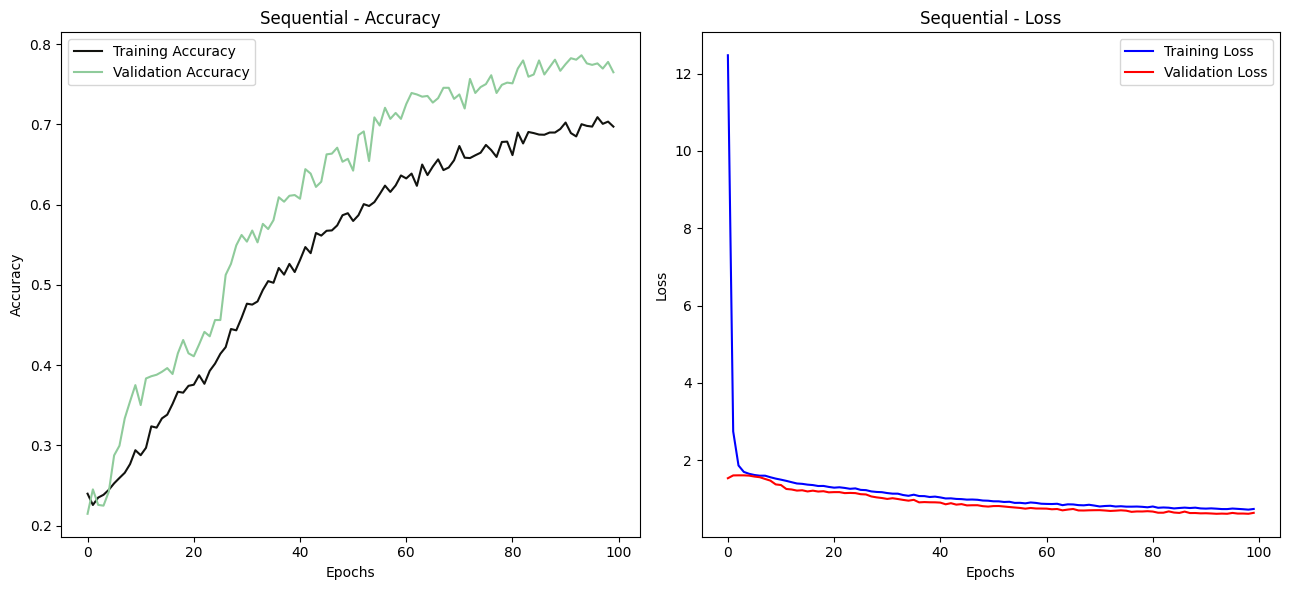

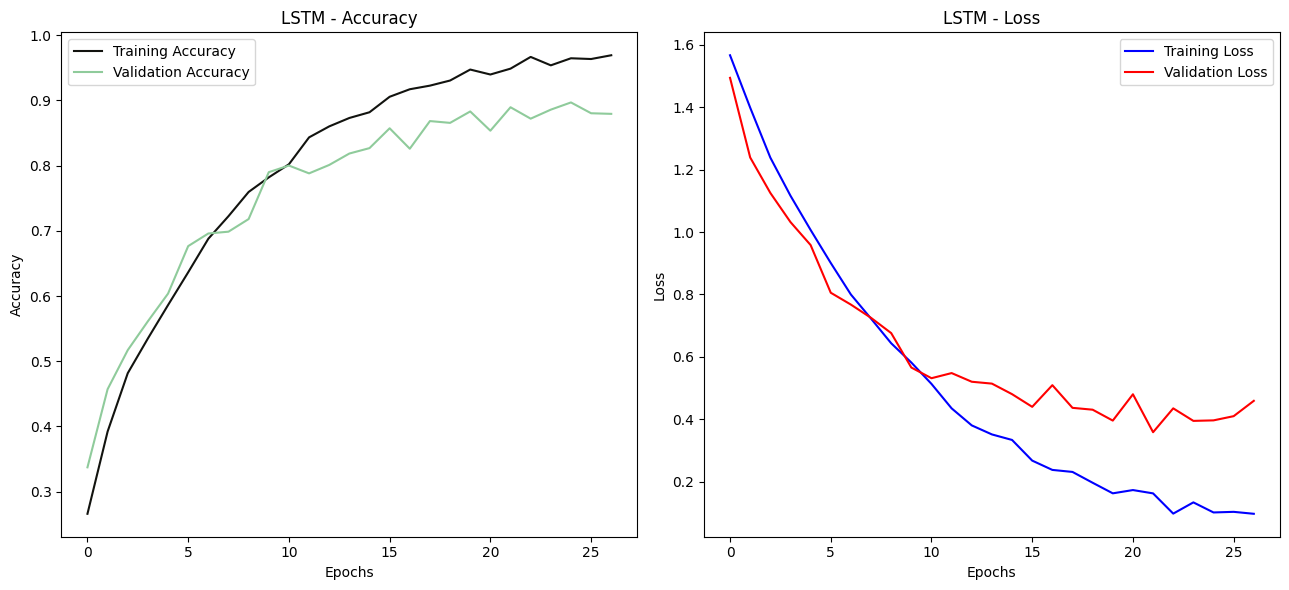

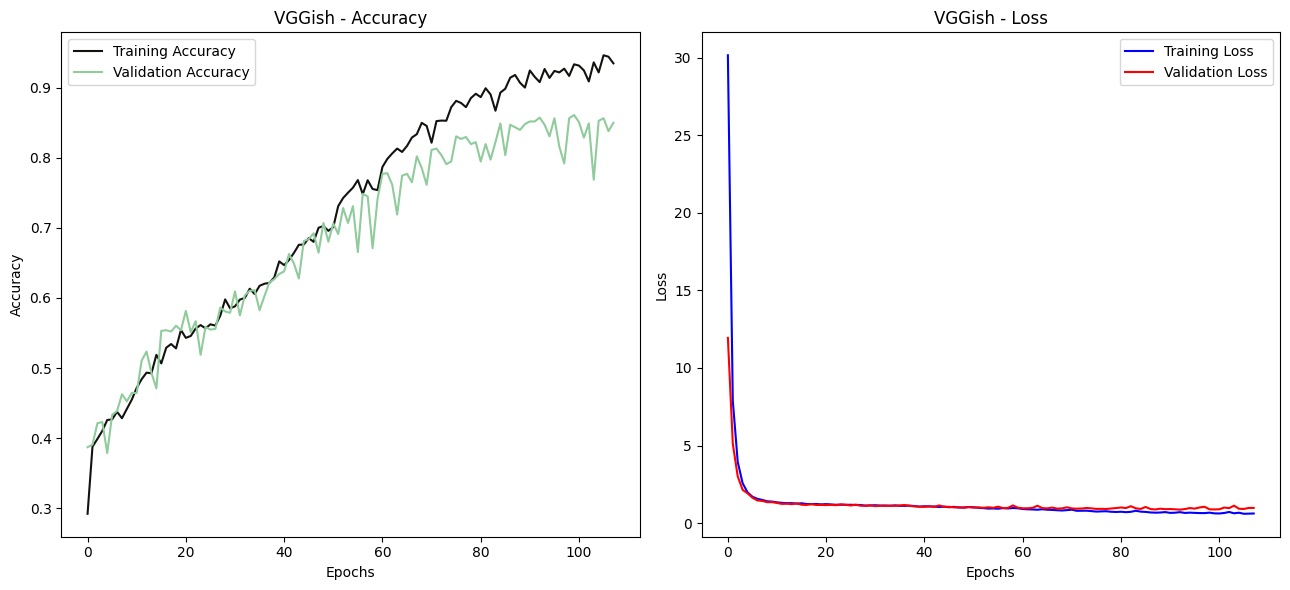

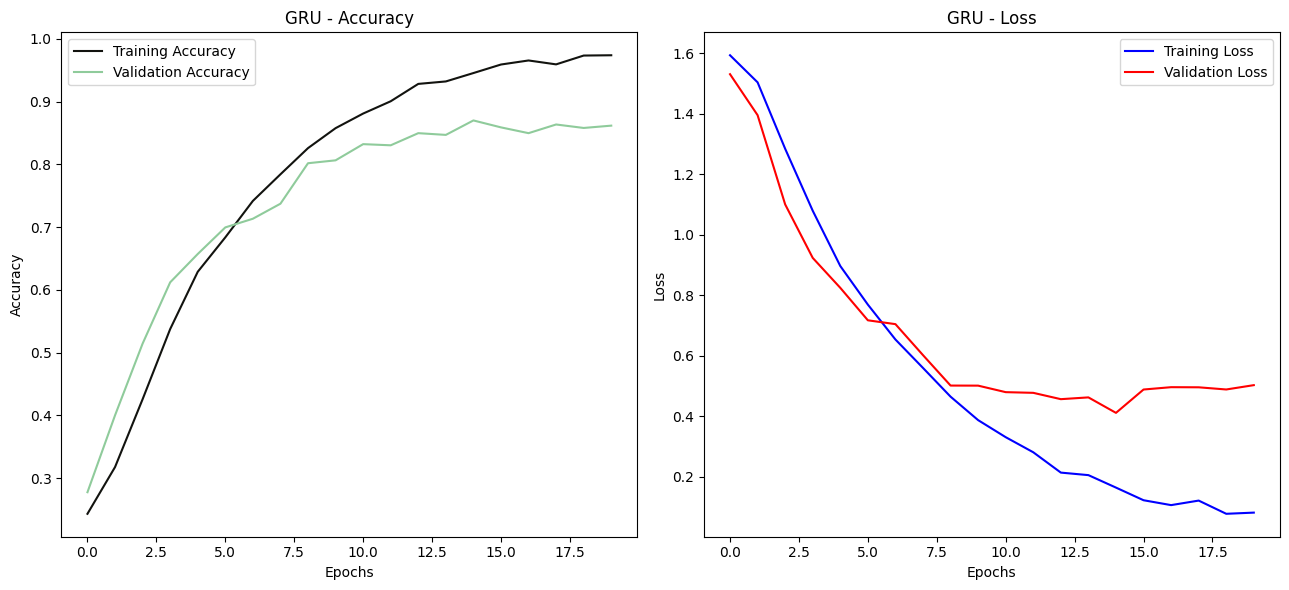

In [51]:
import matplotlib.pyplot as plt

def plot_metrics(history, title, save_path=None):
    plt.figure(figsize=(13, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy',color='#12130F')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy',color='#8FCB9B')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss',color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss',color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)  # Save the figure in jpg format
    else:
        plt.show()

# Plot graphs for the original model
plot_metrics(history, 'Sequential', 'sequential_metrics.jpg')

# Plot graphs for the LSTM model
plot_metrics(history_lstm, 'LSTM', 'lstm_metrics.jpg')

# Plot graphs for the VGGish model
plot_metrics(history_vggish, 'VGGish', 'vggish_metrics.jpg')

plot_metrics(history_gru, 'GRU', 'gru_metrics.jpg')